<a href="https://colab.research.google.com/github/gabriel-francelino/Atividade1_EDA/blob/main/EDA_DadoInformacaoConhecimento_UnlabeledData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando um conjunto desconhecido.

<p align=center>
  <img src="https://cdn.mos.cms.futurecdn.net/60556fccbb8fcafc2abad352f075d642.jpg" width="400px">
</p>

Geralmente, é comum nos depararmos com um conjunto de dados desconhecido na resolução de um determinado problema. Para maximizar os resultados torna-se necessário conhecer os dados, mesmo que superficialmente, antes de iniciar a análise.

Por exemplo, conhecer os campos disponíveis, seus tipos de dados, contagem de valores ausentes, suas distribuições e presença/ausência de outliers ajudam a avaliar a adequação do conjunto de dados para a análise direcionada bem como para saber onde ele precisa de limpeza.

## Importação e compreensão dos dados

A linguagem de programação utilizada em nossos experimentos será a linguagem Python. Para execução das tarefas relacionadas aos algoritmos de Análise Exploratória de Dados exitem várias bibliotecas em Python que facilitam o desenvolvimento de aplicações e a tomada de decisões.


Entre as inúmeras bibliotecas disponíveis, destacam-se:

1.   [**Pandas**](https://pandas.pydata.org/): Biblioteca Python para manipulação e análise de dados. Oferece estruturas e operações para manipular tabelas e séries temporais. É um software livre com licença tipo BSD.
2.   [**Matplotlib**](https://matplotlib.org/): Biblioteca Python para visualização de dados, também é distibuída com licença de software tipo BSD.
3.   [**Numpy**](https://numpy.org/): Biblioteca Python com licença tipo BDS para manipulação de arrays e matrizes. É uma ferramenta extremamente útil para trabalhar a base de dados.
4. [**Seaborn**](https://github.com/mwaskom/seaborn): É uma biblioteca Python também com licença tipo BSD utilizada para visualização de dados em alto nível. Trabalha com a biblioteca **Matplotlib** e possui integração com as estruturas da biblioteca **Pandas**.
5. [**Scikit-learn**](https://scikit-learn.org/stable/): Trata-se de uma biblioteca de aprendizado de máquina escrita em Pyton, possui licença licença tipo BSD e inclui vários algoritmos de classificação, regressão e agrupamento. É uma das bibliotecas mais utilizadas no desenvovimento de algoritmos de aprendizado de máquina.





In [29]:
# Importanto as bibliotecas Python necessarias ao experimento
# Manipulacao matricial e visualizacao grafica
#--------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando a base de dados em um objeto DataFrame pertencente a biblioteca Pandas
# O arquivo .csv esta disponivel para download no Google Classroom.
localDataEndereco = "https://raw.githubusercontent.com/gabriel-francelino/Atividade1_EDA/main/Data%20Carrard%20et%20al.%202022%20MedTeach.csv"
df = pd.read_csv(localDataEndereco)

A análise da base de dados é um processo vital no desenvolvimento de um modelo baseado em aprendizado supervisionado.

In [30]:
# Exibindo  dimensao da base de dados
print("Dimensão dos dados:")
print("Linhas (Instâncias):{}".format(df.shape[0]))
print("Colunas (Atributos):{}".format(df.shape[1]))

Dimensão dos dados:
Linhas (Instâncias):886
Colunas (Atributos):20


É importante observar os dados valores da base de dados é um fator importante que permite obtenção de conhecimento sobre os dados.

Como trata-se de um base de apenas 32 instâncias (linhas) e 11 atributos (colunas) é possível analisar todos os números em pouco tempo.

In [31]:
# Apresenta, de forma completa, as cinco primeiras instâncias da base de dados.
df.head()

id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23

In [32]:
#Apresentando a base completa
df

id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  \
0       2   18     1    1    120     1    0      56       3     0    88   
1       4   26     4    1      1     1    0      20       4     0   109   
2       9   21     3    2      1     0    0      36       3     0   106   
3      10   21     2    2      1     0    1      51       5     0   101   
4      13   21     3    1      1     1    0      22       4     0   102   
..    ...  ...   ...  ...    ...   ...  ...     ...     ...   ...   ...   
881  1781   21     2    1      1     1    0      45       3     0   106   
882  1785   20     2    2      1     0    0      13       3     0   113   
883  1787   19     1    1      1     0    0      50       5     0   100   
884  1789   24     5    2      1     0    0      20       2     1   120   
885  1790   22     3    1      1     0    1      20       5     0   102   

     qcae_cog  qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0          62        27    17   0.738095    34      61      17      13      20  
1          55        37    22   0.690476     7      33      14      11      26  
2          64        39    17   0.690476    25      73      24       7      23  
3          52        33    18   0.833333    17      48      16      10      21  
4          58        28    21   0.690476    14      46      22      14      23  
..        ...       ...   ...        ...   ...     ...     ...     ...     ...  
881        63        39    28   0.619048    41      39      23       4      34  
882        67        40    21   0.809524    26      41      17       5      24  
883        50        31    24   0.547619    14      45      15       8      31  
884        64        39    21   0.785714    33      58      22      15      19  
885        54        26    25   0.571429     5      27      11       9      30  

[886 rows x 20 columns]

**Considerações sobre os atributos:**

1. Não há nenhuma informação prévia sobre os atributos na base dados.

2. Sabe-se apenas que são 11 atributos (colunas) rotulados conforme a ordem do alfabeto.


Outro ponto interessante, é conhecer o tipo de dado que que cada instância possui por meio do comando `df.info()`.

Nessa análise primária, foi possível ver que tem-se 5 dados ponto flutuante e 6 dados inteiros. A análise nos permite verificar também que nenhum dos atributos é `null`.


In [33]:
# Mostra o tipo de cada dado que caracterizam cada instancia
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         886 non-null    int64  
 1   age        886 non-null    int64  
 2   year       886 non-null    int64  
 3   sex        886 non-null    int64  
 4   glang      886 non-null    int64  
 5   part       886 non-null    int64  
 6   job        886 non-null    int64  
 7   stud_h     886 non-null    int64  
 8   health     886 non-null    int64  
 9   psyt       886 non-null    int64  
 10  jspe       886 non-null    int64  
 11  qcae_cog   886 non-null    int64  
 12  qcae_aff   886 non-null    int64  
 13  amsp       886 non-null    int64  
 14  erec_mean  886 non-null    float64
 15  cesd       886 non-null    int64  
 16  stai_t     886 non-null    int64  
 17  mbi_ex     886 non-null    int64  
 18  mbi_cy     886 non-null    int64  
 19  mbi_ea     886 non-null    int64  
dtypes: float64

A presença de dados faltantes ou (missing values) pode ser verificada pelo comando  `df.isna().sum()`.

In [34]:
# Verificação da presença de valores ausentes
df.isna().sum()

id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

As medidas estatísicas de cada atributo podem ser visualizadas por meio do comando `df.describe()`.

In [35]:
# Mostra as estatísticas descritivas de cada atributo.
df.describe()

id         age        year         sex       glang  \
count   886.000000  886.000000  886.000000  886.000000  886.000000   
mean    889.709932   22.383747    3.102709    1.695260   14.327314   
std     515.555875    3.300664    1.763937    0.472665   32.366389   
min       2.000000   17.000000    1.000000    1.000000    1.000000   
25%     447.500000   20.000000    1.000000    1.000000    1.000000   
50%     876.000000   22.000000    3.000000    2.000000    1.000000   
75%    1341.750000   24.000000    5.000000    2.000000    1.000000   
max    1790.000000   49.000000    6.000000    3.000000  121.000000   

             part         job      stud_h      health        psyt        jspe  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.563205    0.348758   25.288939    3.777652    0.224605  106.374718   
std      0.496269    0.476847   15.927875    1.061497    0.417558    8.784012   
min      0.000000    0.000000    0.000000    1.000000    0.000000   67.000000   
25%      0.000000    0.000000   12.000000    3.000000    0.000000  101.000000   
50%      1.000000    0.000000   25.000000    4.000000    0.000000  107.000000   
75%      1.000000    1.000000   36.000000    5.000000    0.000000  113.000000   
max      1.000000    1.000000   70.000000    5.000000    1.000000  125.000000   

         qcae_cog    qcae_aff        amsp   erec_mean        cesd      stai_t  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    58.525959   34.784424   23.150113    0.720144   18.050790   42.898420   
std      6.570341    5.377062    4.993220    0.093570   11.478731   11.978458   
min     37.000000   18.000000    6.000000    0.357143    0.000000   20.000000   
25%     54.000000   31.000000   20.000000    0.666667    9.000000   34.000000   
50%     58.000000   35.000000   23.000000    0.726190   16.000000   43.000000   
75%     63.000000   39.000000   26.750000    0.785714   25.000000   51.000000   
max     76.000000   48.000000   35.000000    0.952381   56.000000   77.000000   

           mbi_ex      mbi_cy      mbi_ea  
count  886.000000  886.000000  886.000000  
mean    16.878104   10.079007   24.207675  
std      5.256025    4.592609    4.633675  
min      5.000000    4.000000   10.000000  
25%     13.000000    6.000000   21.000000  
50%     17.000000    9.000000   24.000000  
75%     20.000000   13.000000   28.000000  
max     30.000000   24.000000   36.000000

A distribuição dos atributos pode ser visualizada através do histograma. Nota-se que algumas variáveis estão bem distribuídas em torno de uma média e outras tendem a puxar o histograma para um dos lados.

<ipython-input-36-199c6c9cde8c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


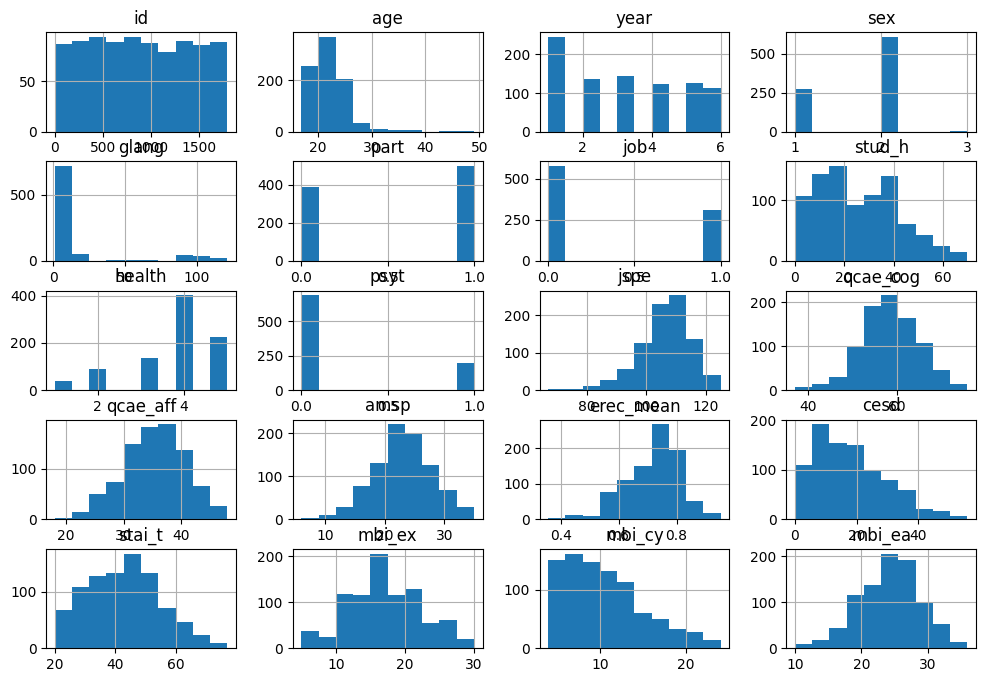

In [36]:
# Utilizando a biblioteca Matplotlib ara visualizar o histograma
fix, ax = plt.subplots(figsize=(12,8))
df.hist(ax=ax)
plt.show()

Como o modelo é inicialmente desconhecido nota-se que a análise da correlação entre os atributos pode conter informações relevantes na descoberta de conhecimento.

In [37]:
# Tabela de correcao entre os atributos de cada instancia
corr = df.corr()
corr

id       age      year       sex     glang      part  \
id         1.000000 -0.015575 -0.017308  0.009421 -0.022209  0.020932   
age       -0.015575  1.000000  0.592530 -0.072708  0.030363  0.187294   
year      -0.017308  0.592530  1.000000 -0.057285 -0.101388  0.146825   
sex        0.009421 -0.072708 -0.057285  1.000000  0.005641  0.000315   
glang     -0.022209  0.030363 -0.101388  0.005641  1.000000 -0.049970   
part       0.020932  0.187294  0.146825  0.000315 -0.049970  1.000000   
job       -0.013165  0.226448  0.216636  0.020879 -0.050746  0.047603   
stud_h     0.008610 -0.293557 -0.521473 -0.013806  0.063462 -0.103950   
health     0.002591 -0.029800  0.084023 -0.087907 -0.013567  0.077115   
psyt      -0.034088  0.015278  0.000861  0.158262 -0.042818  0.026840   
jspe      -0.043873  0.223221  0.301176  0.125781 -0.094676  0.122091   
qcae_cog   0.036164  0.059355  0.076645  0.115706 -0.071495  0.040388   
qcae_aff  -0.025341 -0.008130  0.061427  0.358691 -0.088361  0.009981   
amsp       0.014348  0.000477 -0.013683 -0.129970 -0.044275  0.061602   
erec_mean -0.003440 -0.018699  0.080132  0.210735 -0.098981  0.030255   
cesd       0.025713 -0.139106 -0.242121  0.228820  0.098076 -0.106189   
stai_t    -0.016218 -0.081893 -0.164591  0.250579  0.091851 -0.072290   
mbi_ex    -0.020312 -0.182733 -0.244105  0.155591  0.038015 -0.012205   
mbi_cy    -0.014694 -0.001853  0.077246  0.018912  0.036921 -0.018554   
mbi_ea     0.027984  0.046130 -0.010216 -0.043815 -0.001697  0.047845   

                job    stud_h    health      psyt      jspe  qcae_cog  \
id        -0.013165  0.008610  0.002591 -0.034088 -0.043873  0.036164   
age        0.226448 -0.293557 -0.029800  0.015278  0.223221  0.059355   
year       0.216636 -0.521473  0.084023  0.000861  0.301176  0.076645   
sex        0.020879 -0.013806 -0.087907  0.158262  0.125781  0.115706   
glang     -0.050746  0.063462 -0.013567 -0.042818 -0.094676 -0.071495   
part       0.047603 -0.103950  0.077115  0.026840  0.122091  0.040388   
job        1.000000 -0.202371 -0.022981  0.060138  0.077749  0.024697   
stud_h    -0.202371  1.000000 -0.073520 -0.033045 -0.134662 -0.023048   
health    -0.022981 -0.073520  1.000000 -0.137032 -0.003536 -0.026957   
psyt       0.060138 -0.033045 -0.137032  1.000000  0.048500  0.046266   
jspe       0.077749 -0.134662 -0.003536  0.048500  1.000000  0.342668   
qcae_cog   0.024697 -0.023048 -0.026957  0.046266  0.342668  1.000000   
qcae_aff  -0.000171 -0.032268 -0.063244  0.123249  0.263384  0.258696   
amsp       0.028291 -0.001583  0.027197 -0.072552  0.099395  0.386682   
erec_mean  0.015056 -0.056122  0.024235  0.003468  0.097062  0.073708   
cesd      -0.059803  0.174085 -0.358049  0.268491 -0.080058 -0.034244   
stai_t    -0.063029  0.152052 -0.305345  0.293282 -0.075036 -0.077868   
mbi_ex    -0.065522  0.185804 -0.285564  0.177242 -0.040542 -0.023630   
mbi_cy     0.009590 -0.087386 -0.188539  0.145702 -0.006981 -0.024820   
mbi_ea    -0.018498  0.101732  0.224193 -0.162544  0.082508  0.184096   

           qcae_aff      amsp  erec_mean      cesd    stai_t    mbi_ex  \
id        -0.025341  0.014348  -0.003440  0.025713 -0.016218 -0.020312   
age       -0.008130  0.000477  -0.018699 -0.139106 -0.081893 -0.182733   
year       0.061427 -0.013683   0.080132 -0.242121 -0.164591 -0.244105   
sex        0.358691 -0.129970   0.210735  0.228820  0.250579  0.155591   
glang     -0.088361 -0.044275  -0.098981  0.098076  0.091851  0.038015   
part       0.009981  0.061602   0.030255 -0.106189 -0.072290 -0.012205   
job       -0.000171  0.028291   0.015056 -0.059803 -0.063029 -0.065522   
stud_h    -0.032268 -0.001583  -0.056122  0.174085  0.152052  0.185804   
health    -0.063244  0.027197   0.024235 -0.358049 -0.305345 -0.285564   
psyt       0.123249 -0.072552   0.003468  0.268491  0.293282  0.177242   
jspe       0.263384  0.099395   0.097062 -0.080058 -0.075036 -0.040542   
qcae_cog   0.258696  0.386682   0.073708 -0.034244 -0.077868 

Existem algumas funções que facilitam a visualização de resultados. Uma delas é o mapa de calor que facilita a interpretação da correlação entre variáveis.

<Axes: title={'center': 'Correção de Pearson Base Desconhecida'}>

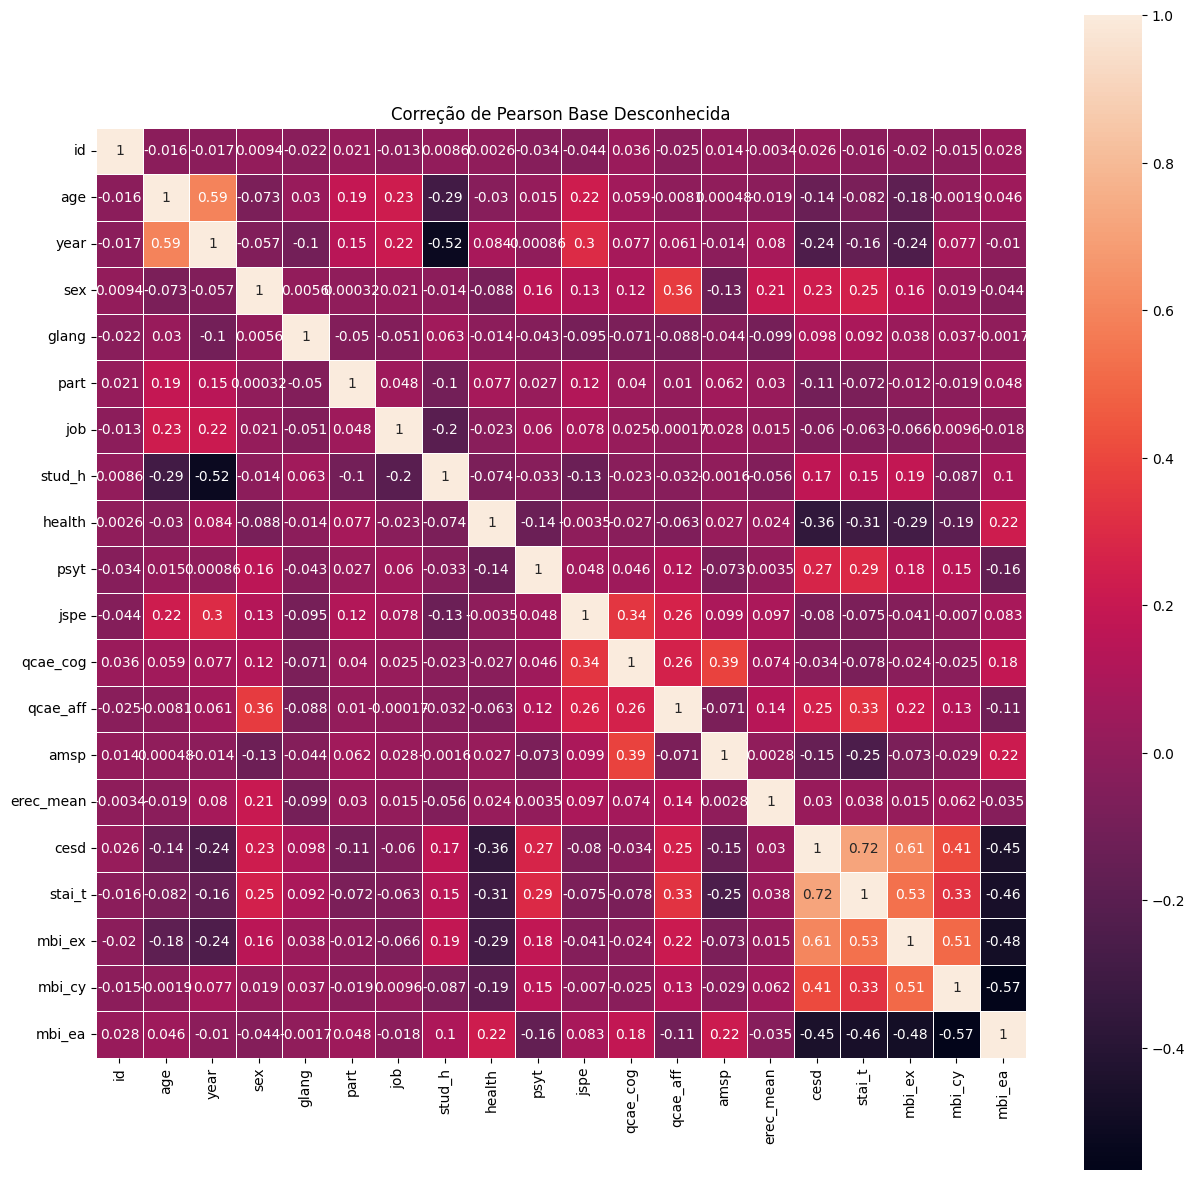

In [38]:
# Configurando o tamando da figura
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Correção de Pearson Base Desconhecida')

# Utilizando a biblioteca Seaborn para visualizar o mapa de calor
sns.heatmap(df.astype(float).corr(),linewidths=0.7,vmax=1.0, square=True, annot=True)

Com base na análise do correlograma é possível notar que alguns atributos possuem uma relação direta e outras uma relação inversa em termos de proporcionalidade.

A análise do gráfico de pares é uma forma de evidenciar e analisar as relações entre os atributos.

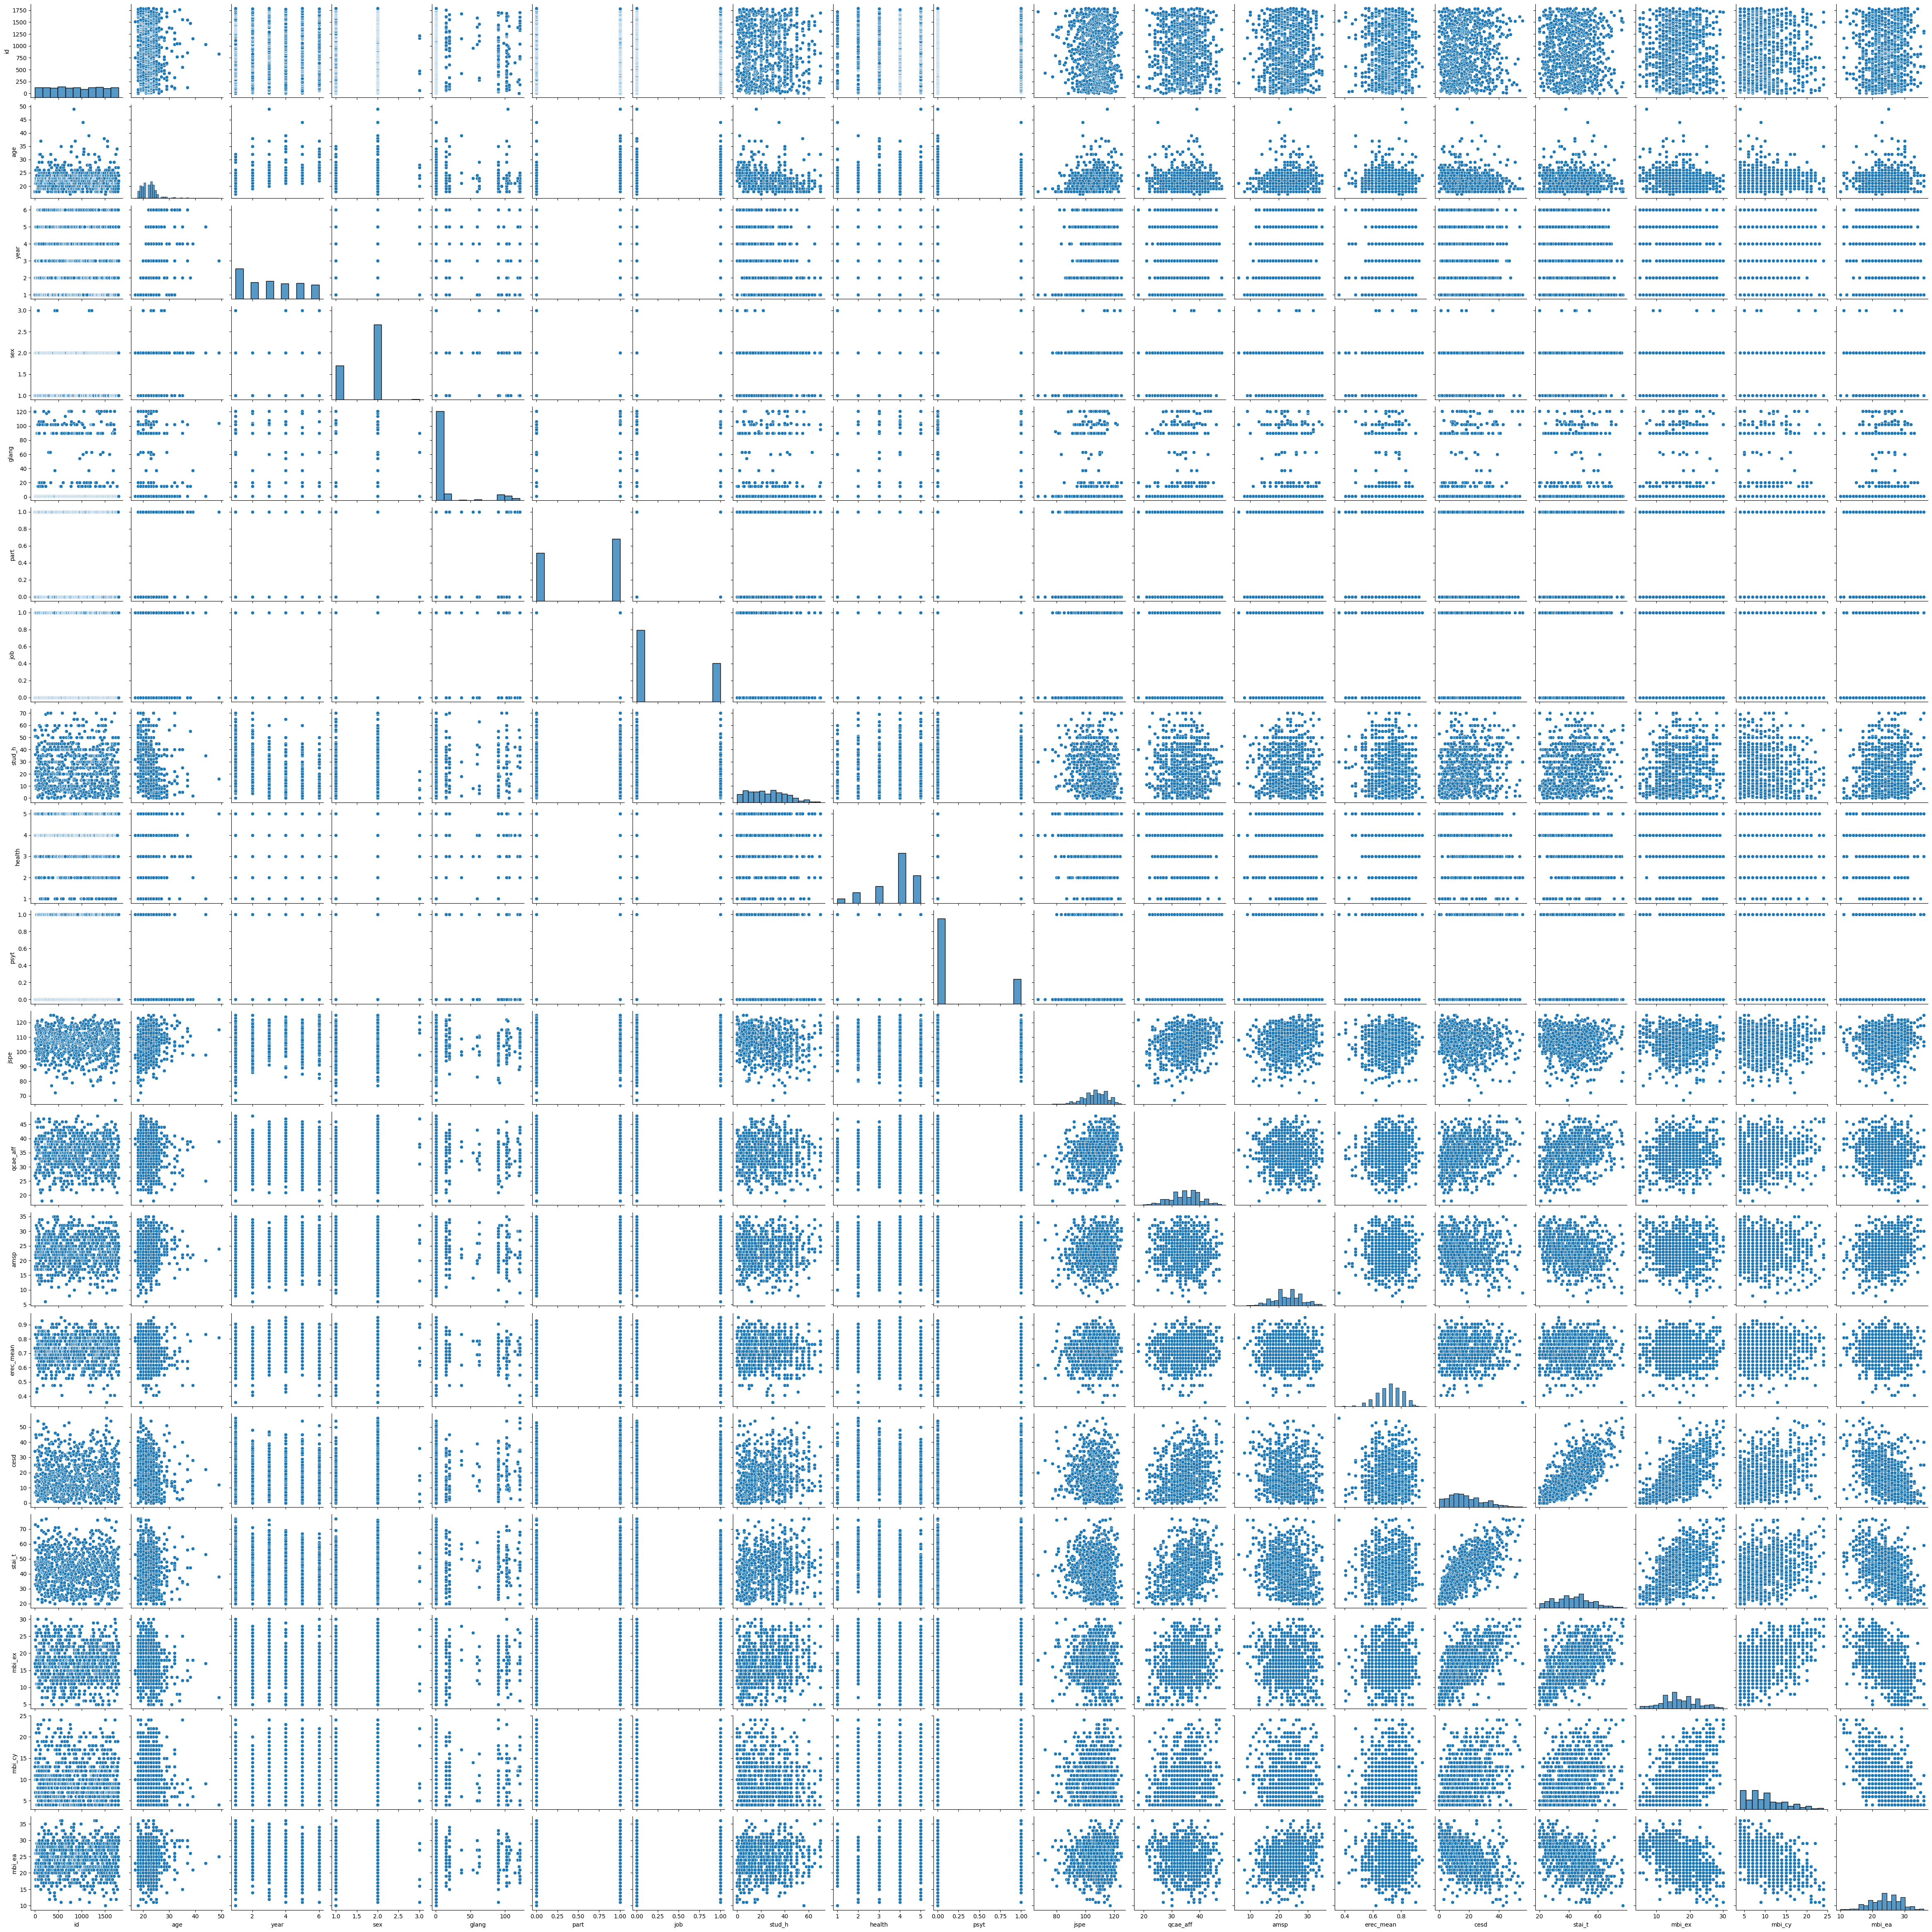

In [39]:
#Plotagem em pares dos atributos da base de dados.
sns.pairplot(data = df, vars=['id','age','year','sex','glang','part','job','stud_h','health','psyt','jspe','qcae_aff','amsp','erec_mean','cesd','stai_t','mbi_ex','mbi_cy','mbi_ea'])
plt.show()

## Considerações

Mesmo sem informações sobre a origem e significado físico dos dados foi possível encontrar relações entre as variáveis.

Foi possível notar que a correção entre alguns atributos se mostrou maior que 0.9 apresentando uma relação diretamente proporcional.

Em linhas gerais, foi possível fazer a transformação de dado em informação, analisando as relações entre os atributos. Lembrando que essa afirmação pode variar para cada tipo de problema em análise.

Espero que você tenha compreendido as explicações.
Desejo um ótimo estudo para você.